In [1]:
# 📦 Imports principaux
import seaborn as sns
from adjustText import adjust_text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from script2 import (
    charger_donnees,
    faire_acp,
    cercle_correlation,
    faire_clustering_kmeans,
    faire_cah,
    dendrogram_multi_cut,
    decrire_clusters,
    afficher_pays_par_cluster,
    visualiser_centroides_clusters,
    tracer_eboulis, 
    extraire_top_pays_par_import,
    tracer_elbow_kmeans,
    evaluer_silhouette_kmeans,
    evaluer_silhouette_cah, 
    afficher_heatmap_loadings,
    afficher_projection_individus,
    afficher_acp_combinee
)

# Pour voir toutes les colonnes du DataFrame
pd.set_option('display.max_columns', None)


In [2]:
# 📥 Charger les fichiers générés par le notebook précédent
table_pays, X_scaled = charger_donnees()

# Retirer les colonnes non numériques avant l’ACP
X = table_pays.drop(columns=['Zone_x', 'Alimentation pour touristes'], errors='ignore')


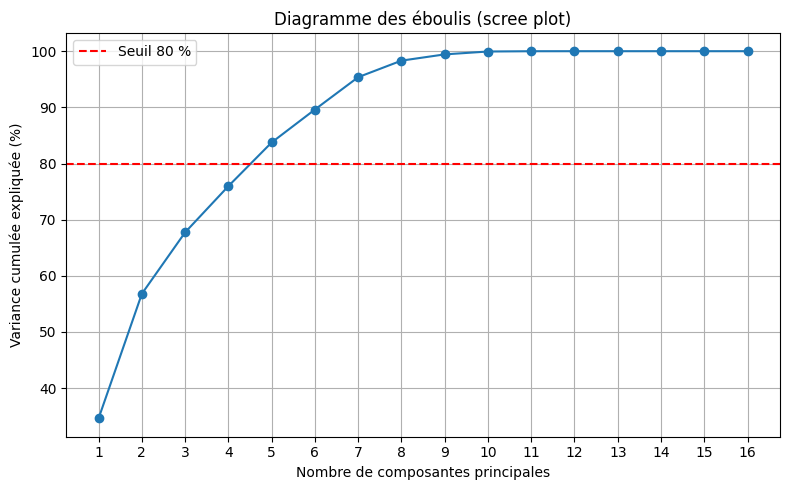

Composante 1 : 34.62 % de variance expliquée
Composante 2 : 22.18 % de variance expliquée
Composante 3 : 10.94 % de variance expliquée
Composante 4 : 8.23 % de variance expliquée
Composante 5 : 7.78 % de variance expliquée
Composante 6 : 5.87 % de variance expliquée
Composante 7 : 5.76 % de variance expliquée
Composante 8 : 2.94 % de variance expliquée
Composante 9 : 1.11 % de variance expliquée
Composante 10 : 0.51 % de variance expliquée
Composante 11 : 0.05 % de variance expliquée
Composante 12 : 0.0 % de variance expliquée
Composante 13 : 0.0 % de variance expliquée
Composante 14 : 0.0 % de variance expliquée
Composante 15 : 0.0 % de variance expliquée
Composante 16 : 0.0 % de variance expliquée


In [3]:
# 📊 Voir la variance expliquée par chaque composante
tracer_eboulis(X_scaled)


Je choisis d'après le diagramme des éboulis 5 composantes principales

  Variance expliquée par composante : [0.34617589 0.22182684 0.10940799 0.08230798 0.07776098]


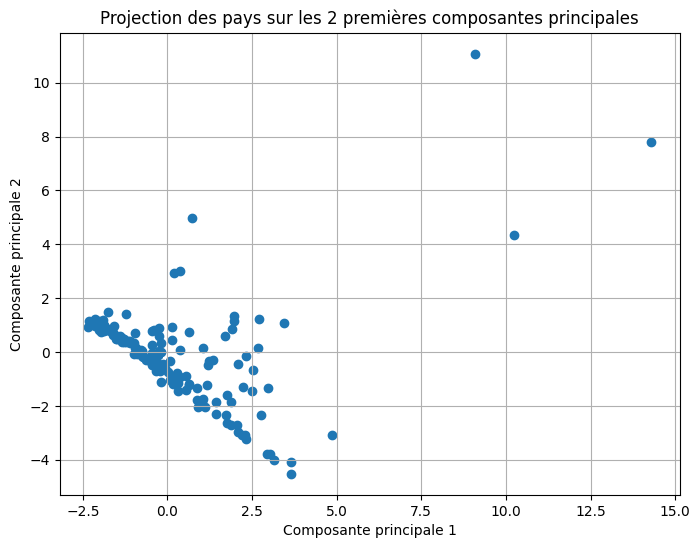

In [4]:
# 🔄 Réduction de dimensions
X_pca, pca = faire_acp(X_scaled)


In [5]:
# 📐 Analyse des valeurs propres : critère de Kaiser & seuil de variance
from script2 import analyser_valeurs_propres

nb_kaiser, nb_seuil_80 = analyser_valeurs_propres(pca, seuil_variance=0.8)



🔍 Analyse des valeurs propres de l'ACP :
  PC1 : valeur propre = 4.87, variance expliquée = 34.62%, cumulée = 34.62%
  PC2 : valeur propre = 3.12, variance expliquée = 22.18%, cumulée = 56.80%
  PC3 : valeur propre = 1.54, variance expliquée = 10.94%, cumulée = 67.74%
  PC4 : valeur propre = 1.16, variance expliquée = 8.23%, cumulée = 75.97%
  PC5 : valeur propre = 1.10, variance expliquée = 7.78%, cumulée = 83.75%

✅ Critère de Kaiser : 5 composantes avec valeur propre > 1
✅ 5 composantes nécessaires pour expliquer 80% de la variance


  Variance expliquée par composante : [0.34617589 0.22182684 0.10940799 0.08230798 0.07776098]


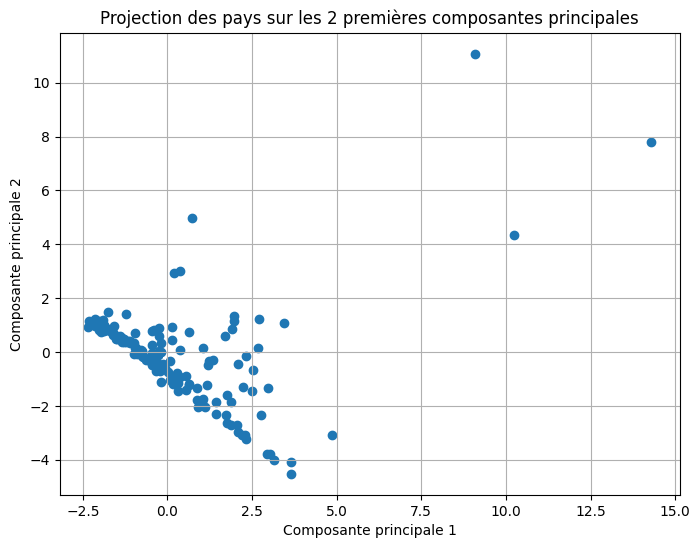

In [6]:
# 📐 Réduction de dimension
X_pca, pca = faire_acp(X_scaled)


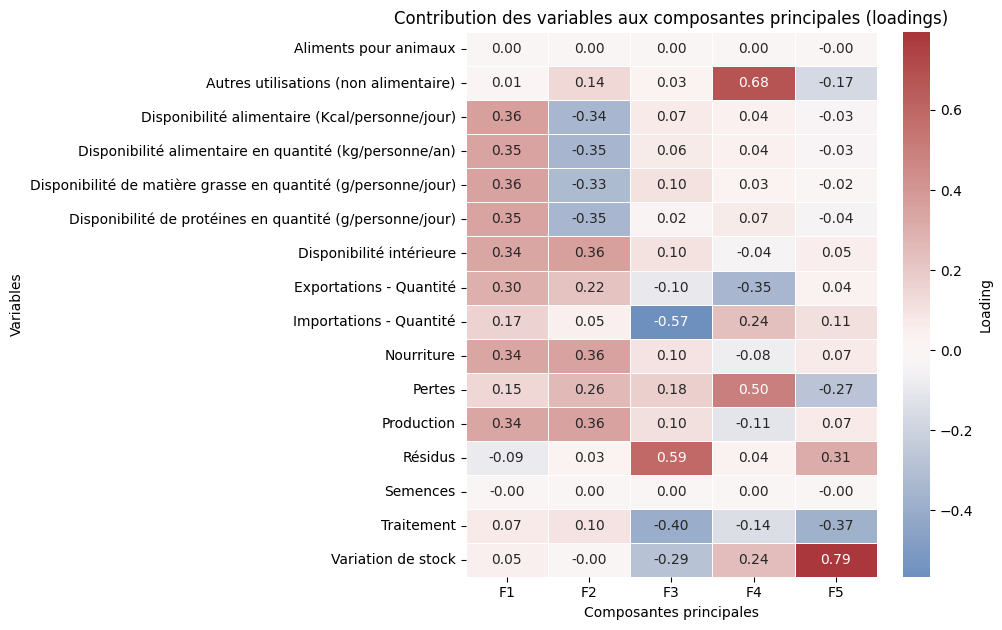

In [7]:
# 🔥 Heatmap des coefficients (loadings)
afficher_heatmap_loadings(pca, X)


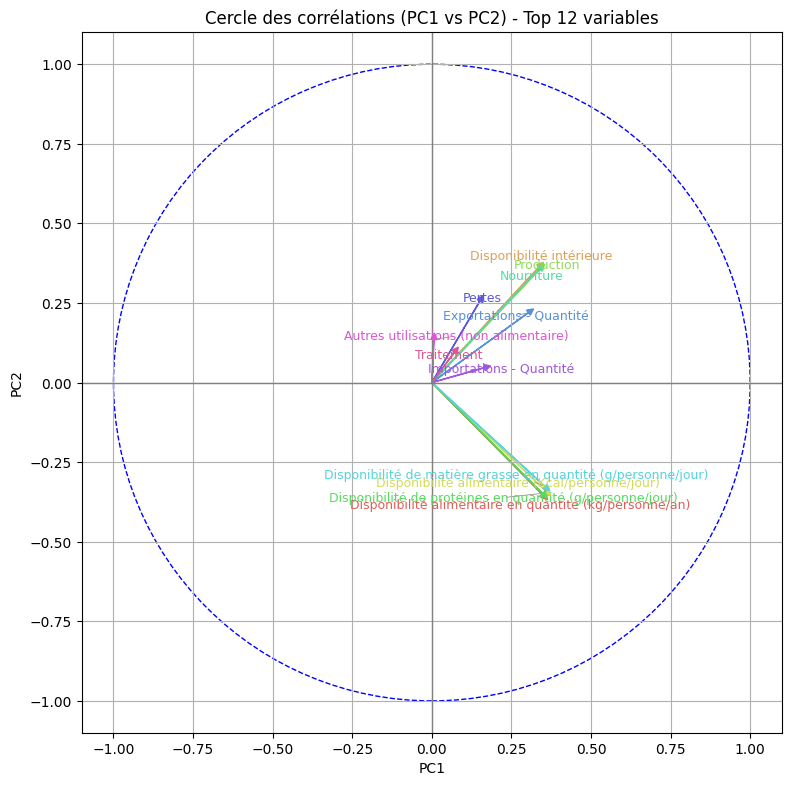

In [8]:
# Variables corrélées avec les 2 premières composantes
cercle_correlation(pca, X)


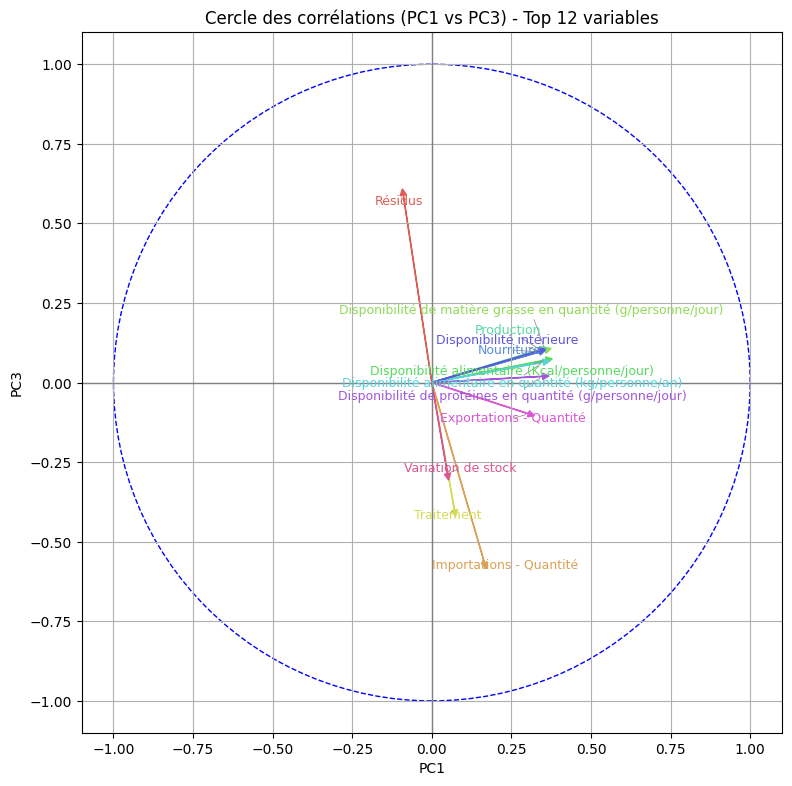

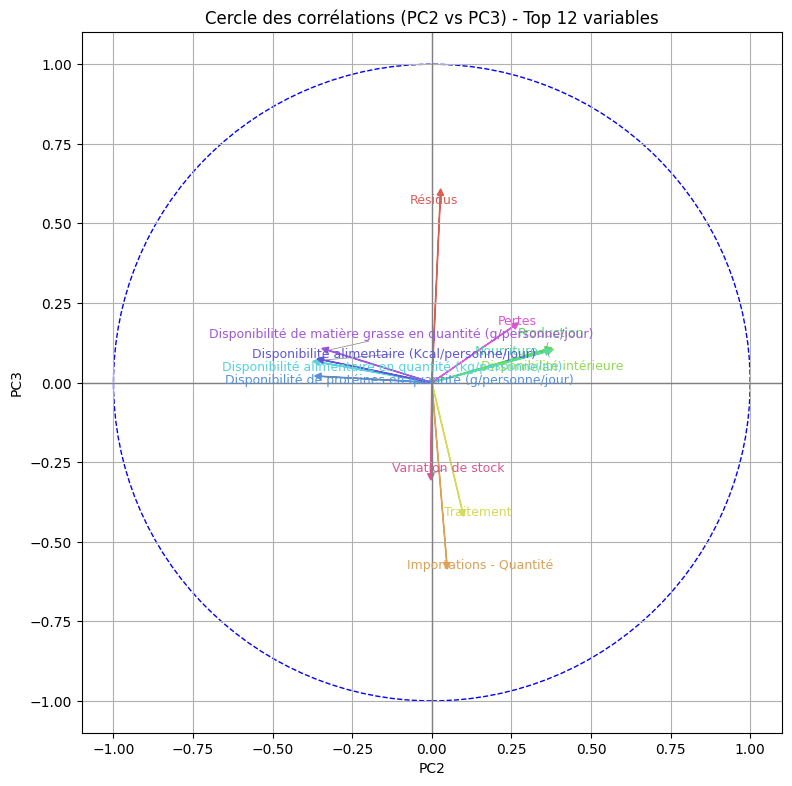

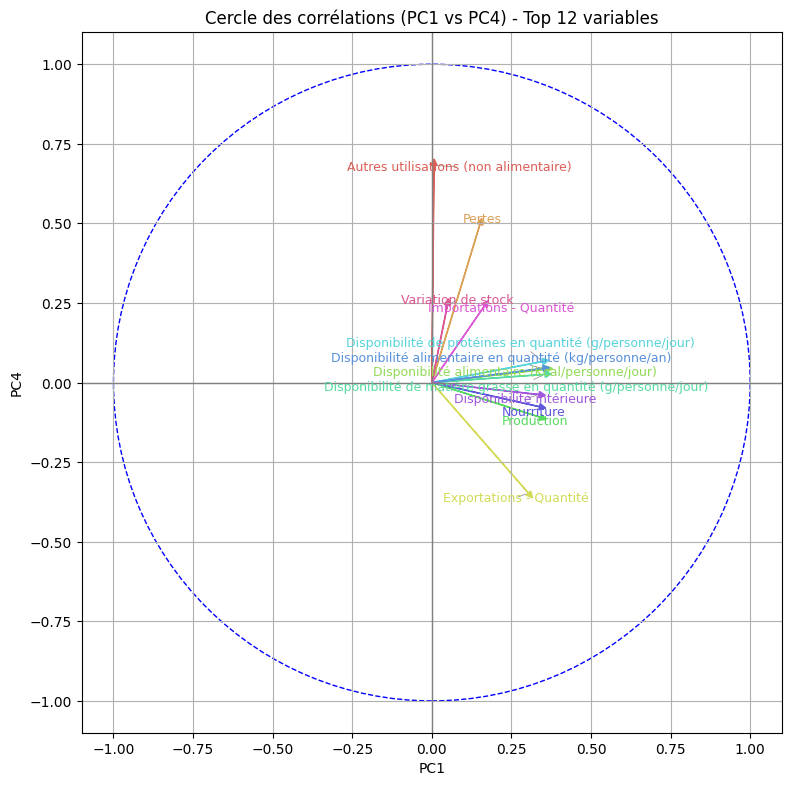

In [9]:
# 🧭 Autres combinaisons de composantes principales
cercle_correlation(pca, X, comp_x=1, comp_y=3)
cercle_correlation(pca, X, comp_x=2, comp_y=3)
cercle_correlation(pca, X, comp_x=1, comp_y=4)


0 [0.40465755 0.42520163]
13 [ 0.94649495 -0.97281908]


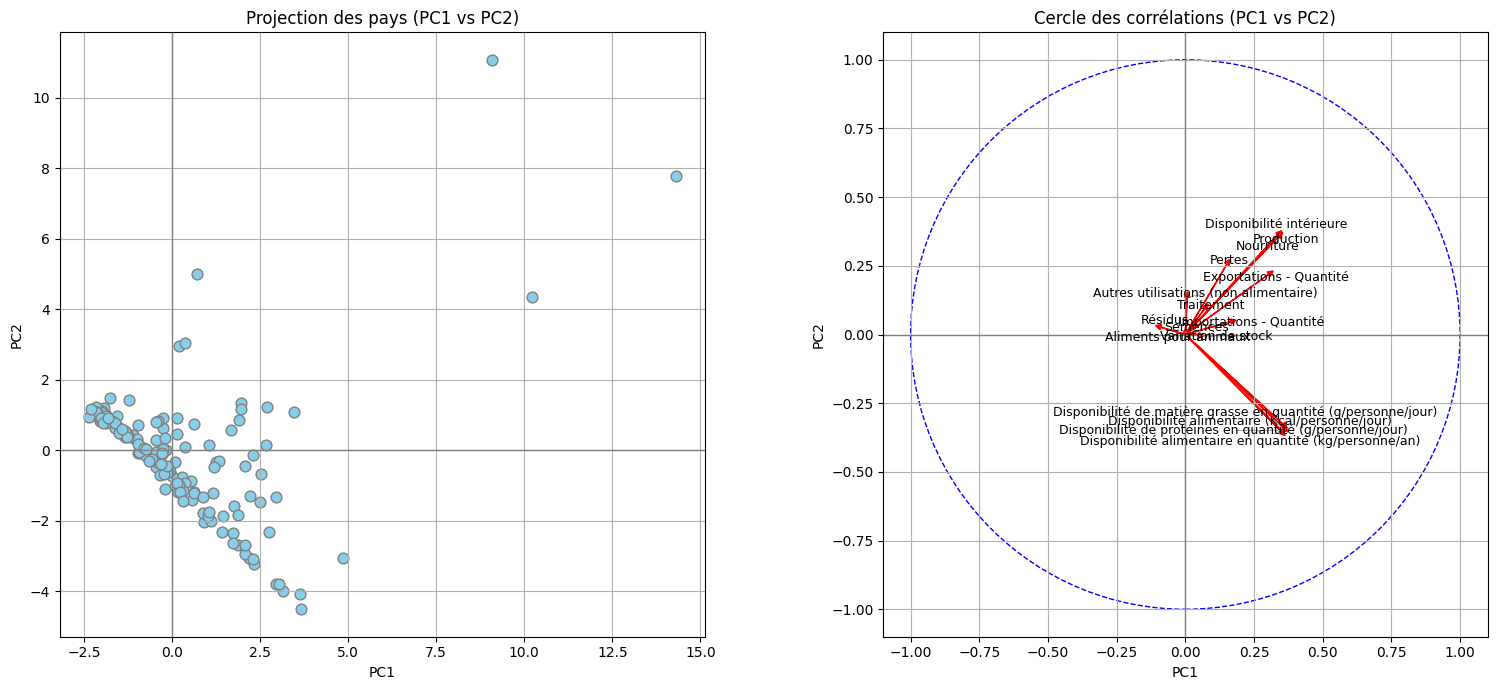

In [10]:
#  Afficher le plan factoriel et le cercle de corrélation côte à côte
afficher_acp_combinee(X_pca, pca, X, table_pays)



CLUSTERING

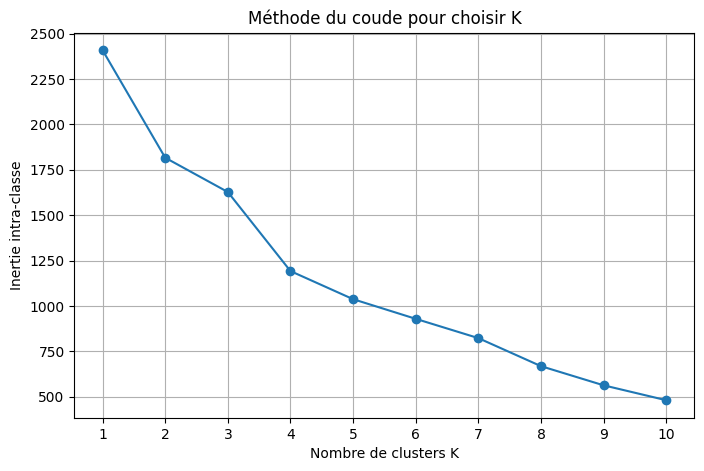

K = 1 --> Inertie = 2408.0
K = 2 --> Inertie = 1816.11
K = 3 --> Inertie = 1627.32
K = 4 --> Inertie = 1192.09
K = 5 --> Inertie = 1037.35
K = 6 --> Inertie = 929.17
K = 7 --> Inertie = 822.94
K = 8 --> Inertie = 668.58
K = 9 --> Inertie = 563.16
K = 10 --> Inertie = 481.04


In [11]:
# 📉 Évaluer le bon K (nombre de clusters)
tracer_elbow_kmeans(X_scaled, k_max=10)



Évaluation du Silhouette score :
K = 2 → Silhouette score = 0.7695
K = 3 → Silhouette score = 0.633
K = 4 → Silhouette score = 0.4138
K = 5 → Silhouette score = 0.425
K = 6 → Silhouette score = 0.3294
K = 7 → Silhouette score = 0.33
K = 8 → Silhouette score = 0.4397
K = 9 → Silhouette score = 0.3553
K = 10 → Silhouette score = 0.375


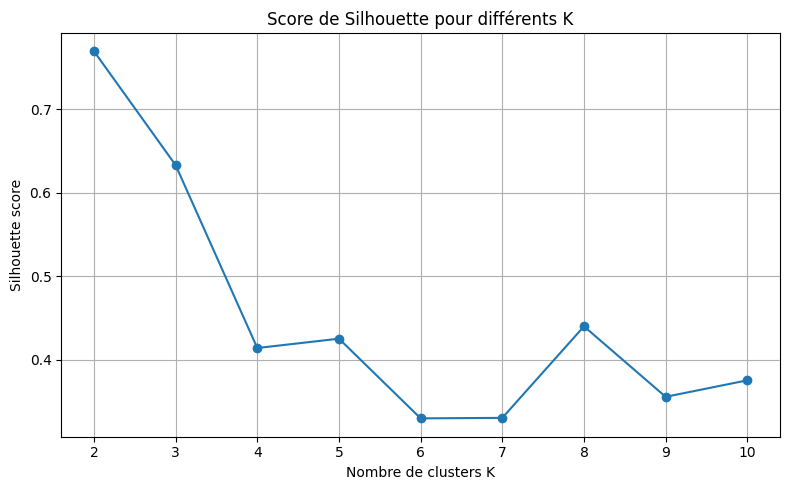

In [12]:
# Évaluer le score de silhouette pour plusieurs valeurs de k
evaluer_silhouette_kmeans(X_scaled, k_min=2, k_max=10)


Je choisis ici k = 2 d'après la méthode du coude et le Silhouette Score

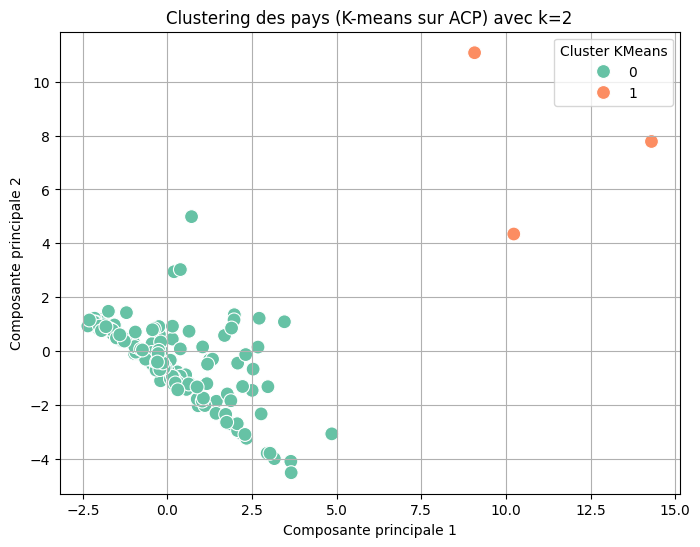

In [13]:
# 📌 Regroupement des pays avec K-means (sur ACP)
table_pays, palette = faire_clustering_kmeans(X_pca, table_pays, k=2)


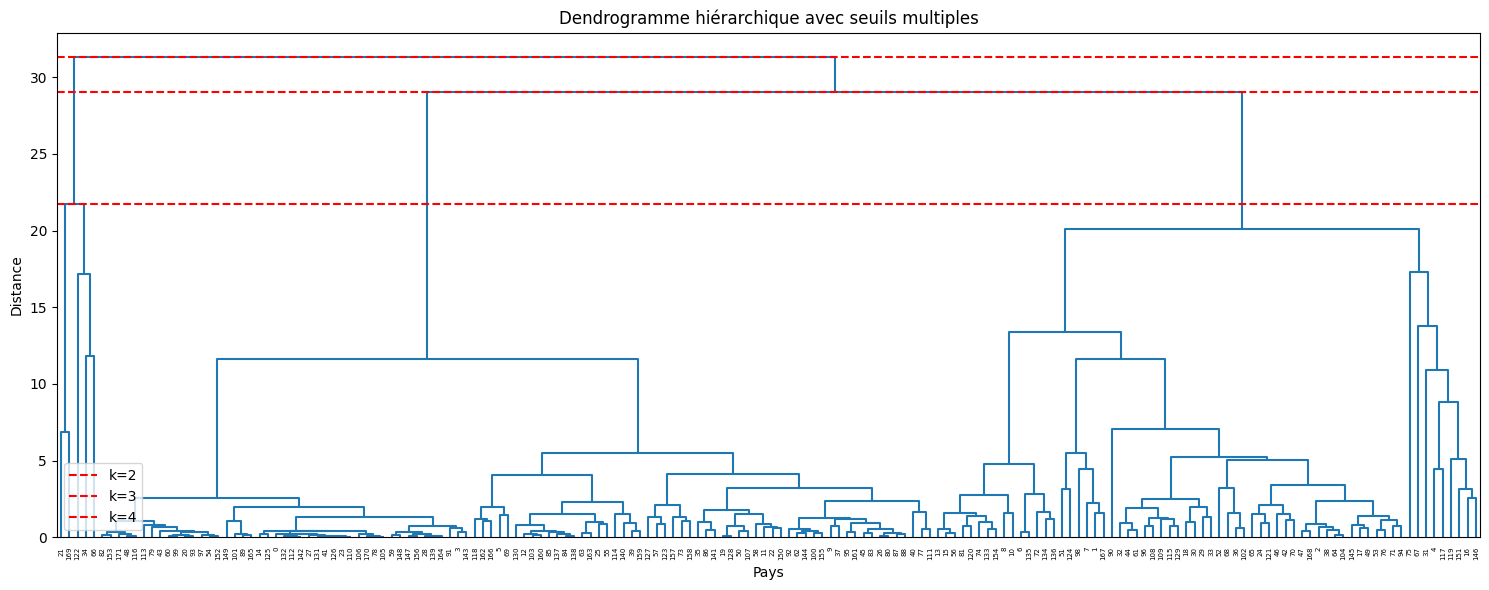

In [14]:
# 🌳 Dendrogramme unique avec seuils pour k=2, 3, 4
dendrogram_multi_cut(X_scaled, ks=[2, 3, 4])


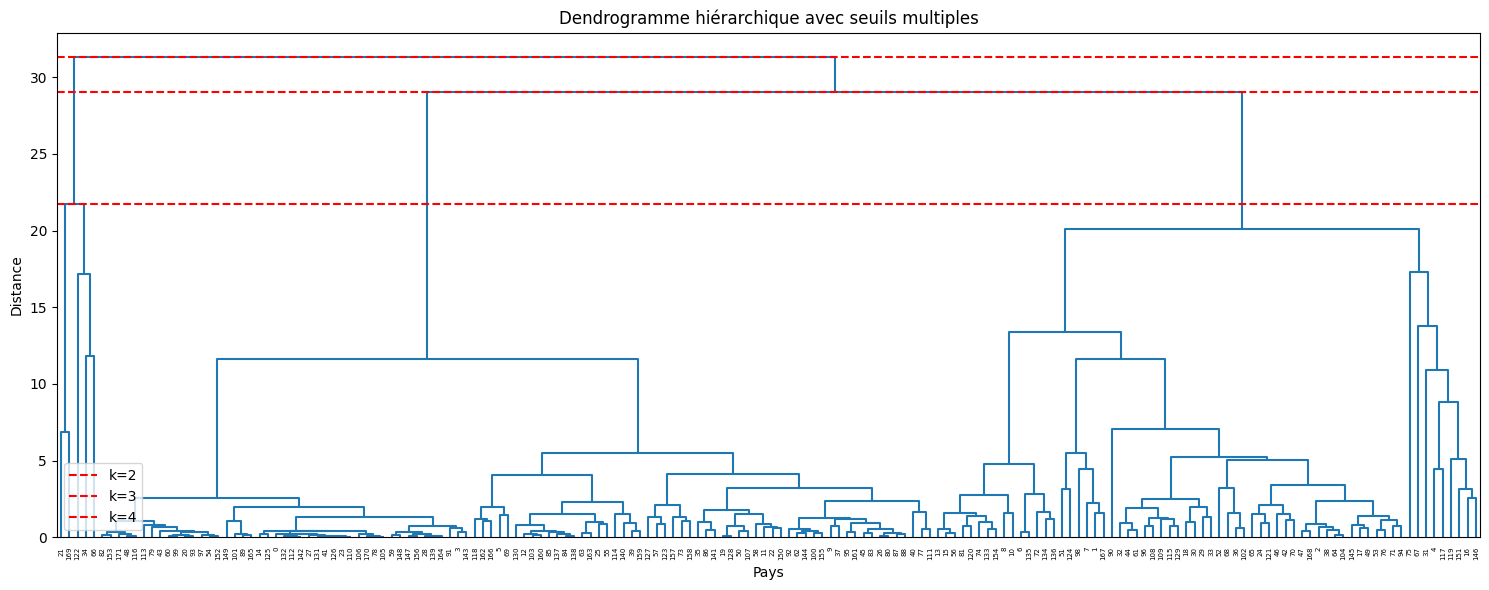


Description des clusters (Cluster_CAH_k2):

                Alimentation pour touristes  Aliments pour animaux  \
Cluster_CAH_k2                                                       
1                                      0.00                    0.0   
2                                      0.23                    0.0   

                Autres utilisations (non alimentaire)  \
Cluster_CAH_k2                                          
1                                              200.87   
2                                               39.42   

                Disponibilité alimentaire (Kcal/personne/jour)  \
Cluster_CAH_k2                                                   
1                                                       110.20   
2                                                        73.49   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Cluster_CAH_k2                                                           
1                               

In [15]:
#  Appliquer la CAH et assigner les clusters pour plusieurs k
table_pays = faire_cah(X_scaled, table_pays, ks=[2, 3, 4])

# 🌳 Afficher le dendrogramme avec seuils multiples
dendrogram_multi_cut(X_scaled, ks=[2, 3, 4])

#  Moyennes des variables dans chaque cluster CAH pour k = 2, 3, 4
# On peut maintenant décrire les clusters car ils existent dans table_pays
for k in [2, 3, 4]:
    col = f'Cluster_CAH_k{k}'
    decrire_clusters(table_pays, cluster_col=col)



In [16]:
# 🌍 Affichage des pays dans chaque cluster
afficher_pays_par_cluster(table_pays, cluster_col='Cluster_KMeans')

for k in [2, 3, 4]:
    col = f'Cluster_CAH_k{k}'
    afficher_pays_par_cluster(table_pays, cluster_col=col)




Pays par cluster (Cluster_KMeans):

Cluster 0 (169 pays) :
Afghanistan, Afrique du Sud, Albanie, Algérie, Allemagne, Angola, Antigua-et-Barbuda, Arabie saoudite, Argentine, Arménie, Australie, Autriche, Azerbaïdjan, Bahamas, Bangladesh, Barbade, Belgique, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Botswana, Bulgarie, Burkina Faso, Bélarus, Bénin, Cabo Verde, Cambodge, Cameroun, Canada, Chili, Chine - RAS de Hong-Kong, Chine - RAS de Macao, Chine, Taiwan Province de, Chypre, Colombie, Congo, Costa Rica, Croatie, Cuba, Côte d'Ivoire, Danemark, Djibouti, Dominique, El Salvador, Espagne, Estonie, Eswatini, Fidji, Finlande, France, Fédération de Russie, Gabon, Gambie, Ghana, Grenade, Grèce, Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Hongrie, Inde, Indonésie, Iran (République islamique d'), Iraq, Irlande, Islande, Israël, Italie, Jamaïque, Japon, Jordanie, Kazakhstan, Kenya, Kirghizistan, Kiribati, Koweït, Lesotho, Lettonie, Liban, Libéria, Lituani

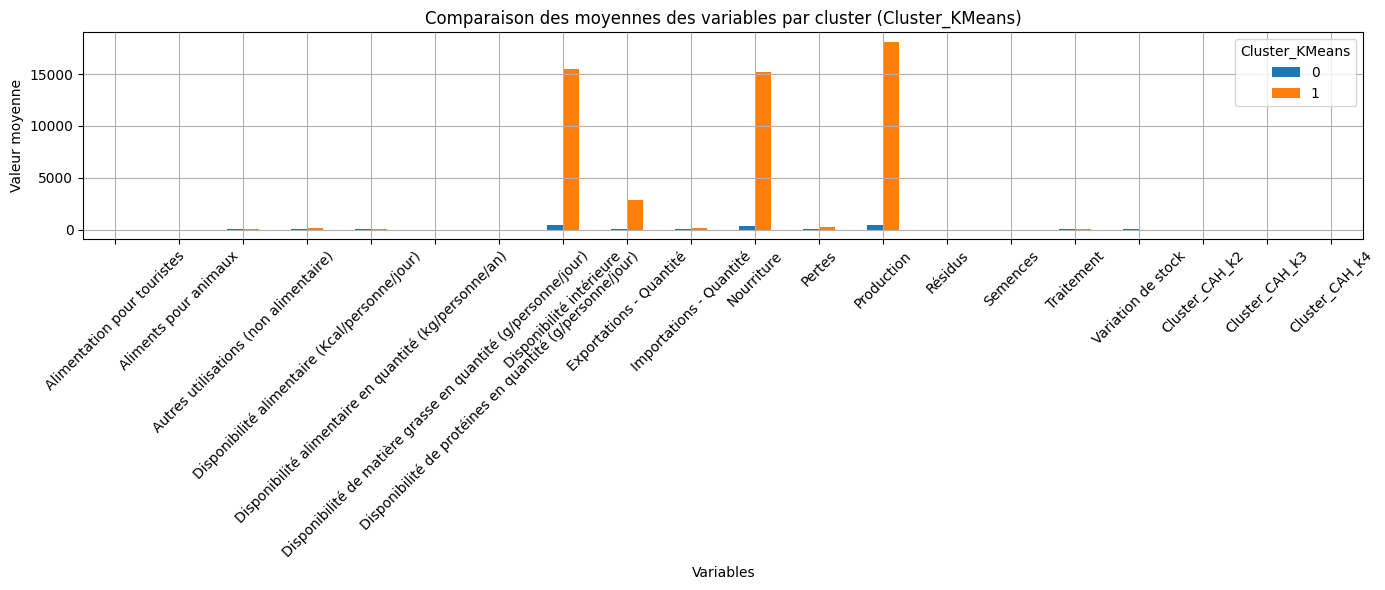

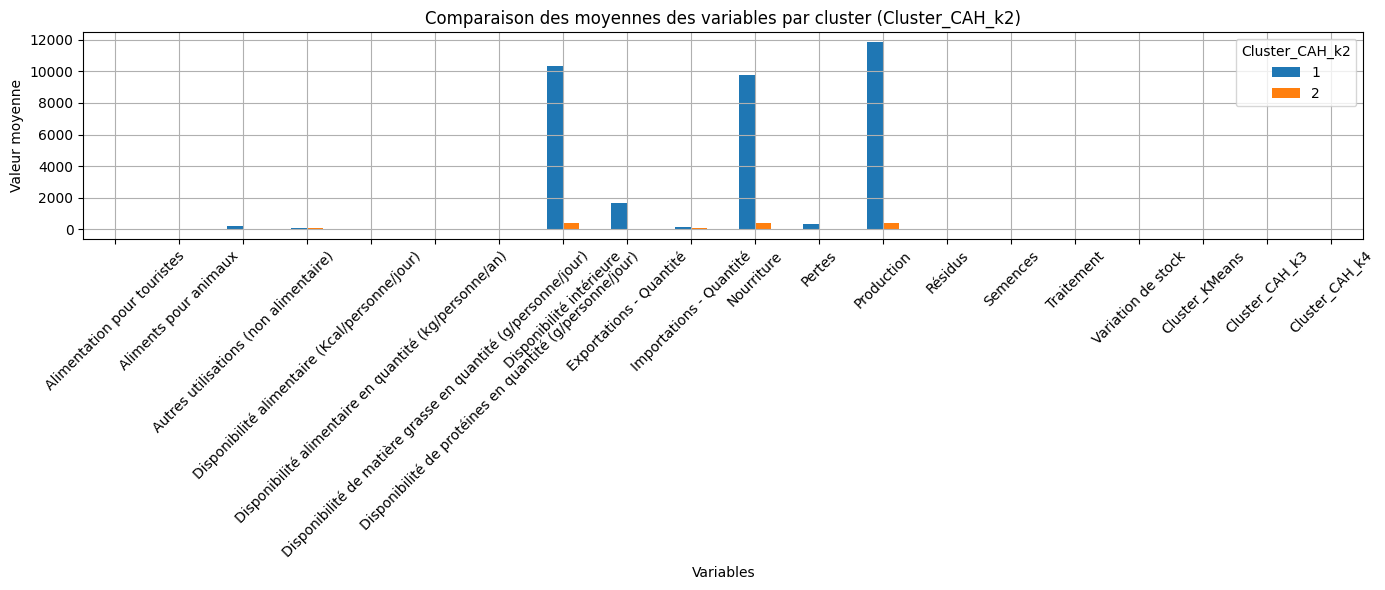

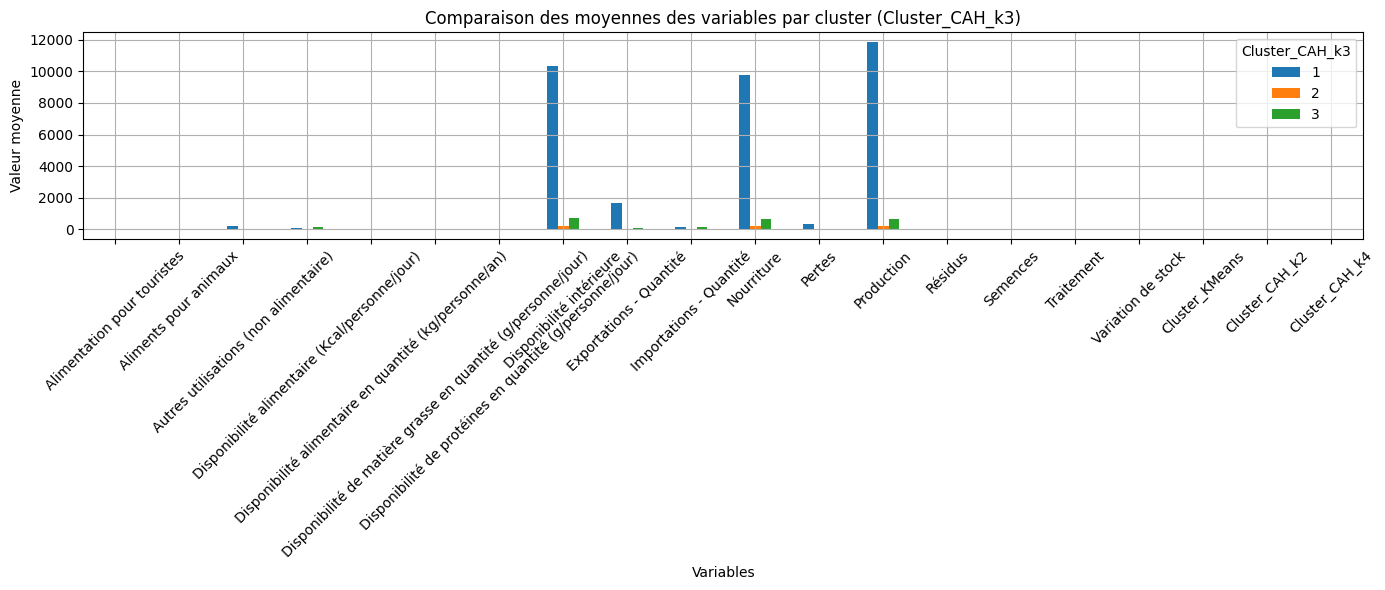

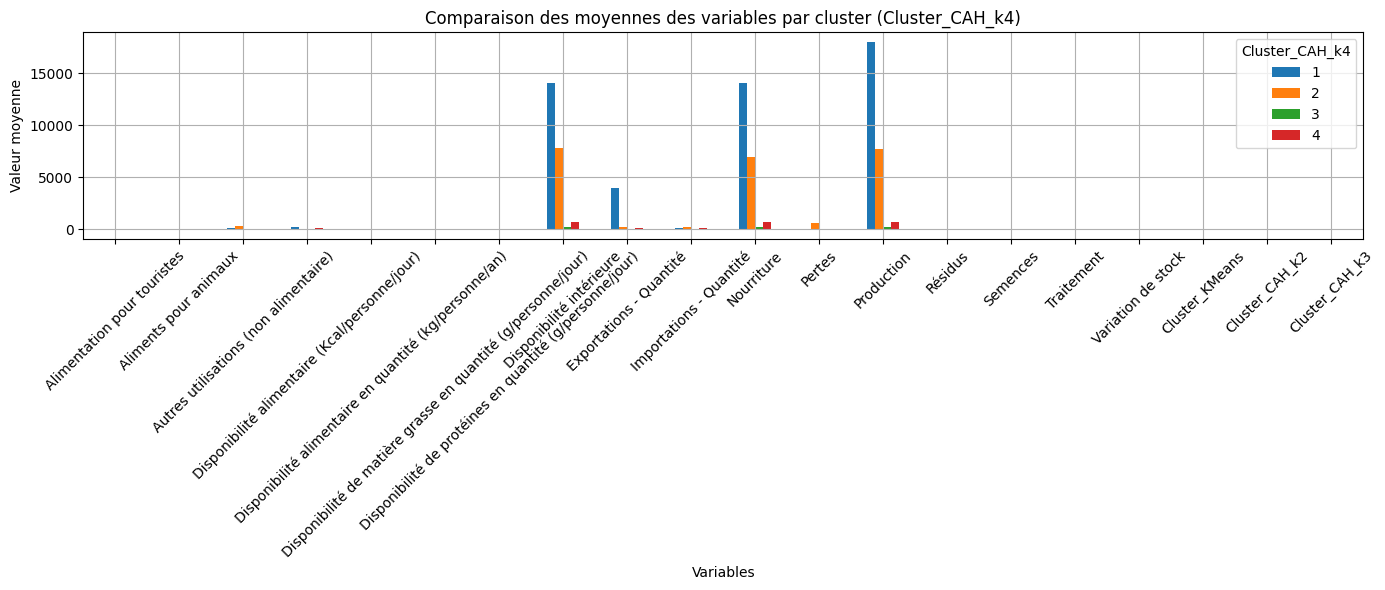

In [17]:
# 📊 Graphiques comparatifs des clusters
visualiser_centroides_clusters(table_pays, cluster_col='Cluster_KMeans')

for k in [2, 3, 4]:
    col = f'Cluster_CAH_k{k}'
    visualiser_centroides_clusters(table_pays, cluster_col=col)



In [18]:
# Évaluer les scores de silhouette pour k = 2, 3, 4
scores_cah = evaluer_silhouette_cah(X_scaled, ks=[2, 3, 4])
best_k = max(scores_cah, key=scores_cah.get)
print(f"✅ Meilleur k selon le Silhouette Score (CAH) : k = {best_k}")



🔍 Évaluation du Silhouette Score pour la CAH :
  ➤ k = 2 → Silhouette Score = 0.7409
  ➤ k = 3 → Silhouette Score = 0.3836
  ➤ k = 4 → Silhouette Score = 0.3889
✅ Meilleur k selon le Silhouette Score (CAH) : k = 2


Je garde donc, d'après le Silhouette Score pour la CAH, k = 2 pour la CONCLUSION FINALE

In [19]:
# 🔍 Les 10 pays du cluster 2 (CAH, k=2) qui importent le plus
top_pays_cluster_2 = extraire_top_pays_par_import(table_pays, cluster_id=2, cluster_col='Cluster_CAH_k2')
top_pays_cluster_2


,Zone_x,Importations - Quantité,Disponibilité intérieure,Production
75,Japon,1069.0,2415.0,2215.0
98,Mexique,972.0,4219.0,3249.0
31,Chine - RAS de Hong-Kong,907.0,280.0,24.0
4,Allemagne,842.0,1739.0,1514.0
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,779.0,2234.0,1814.0
7,Arabie saoudite,722.0,1435.0,616.0
117,Pays-Bas,608.0,372.0,1100.0
1,Afrique du Sud,514.0,2118.0,1667.0
51,France,506.0,1573.0,1750.0
69,Iraq,470.0,566.0,96.0


In [20]:
# 💾 Sauvegarde
table_pays.to_csv("table_pays_clusters.csv", index=False)
print("✅ Fichier avec clusters enregistré sous table_pays_clusters.csv")


✅ Fichier avec clusters enregistré sous table_pays_clusters.csv
